### CIS 9: Lab 3b
Unsupervised Learning: clustering

In [ ]:
### Name: Shamita Goyal

In this lab you'll look at the skill sets of CS and DS students and their job placements in industry. From the dataset you want to see what skills are suitable for a particular job.

The input data is `students.csv` ([source](https://www.kaggle.com/datasets/yuvjeetarora/student-job-profile/data))

In [2]:
# import files
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
os.environ["OMP_NUM_THREADS"] = "1"
from sklearn.cluster import KMeans
from collections import defaultdict

In [3]:
import os

new_directory_path = '/Users/shamitagoyal/Desktop/data_science_files/data_files/lab2b_data'

# Change the current working directory
os.chdir(new_directory_path)

1. __Read data into a DataFrame__,<br>
__print the number of rows and columns of the DataFrame__,<br>
then __print the first 5 rows of the DataFrame__.

In [4]:
students_data = pd.read_csv("students.csv")
print(f"The data has {students_data.shape[0]} rows and {students_data.shape[1]} columns.")
students_data.head()

The data has 707 rows and 13 columns.


,DSA,DBMS,OS,CN,Mathmetics,Aptitute,Comm,Problem Solving,Creative,Hackathons,Skill 1,Skill 2,Profile
0,49,22,41,26,7,28,61,1,8,3,Javascript,Photoshop,UI/UX
1,39,46,45,47,3,35,65,4,10,4,HTML/CSS,GitHub,UI/UX
2,28,32,45,35,10,23,85,3,10,3,Photoshop,Figma,UI/UX
3,52,38,33,38,19,27,62,1,9,3,Photoshop,Figma,UI/UX
4,23,31,30,38,10,13,72,4,8,5,HTML/CSS,Figma,UI/UX


---

#### 2. Clean data

2a. __Print the number of NaNs__, and __remove any rows with NaNs__.

In [5]:
students_data.isna().sum()

DSA                0
DBMS               0
OS                 0
CN                 0
Mathmetics         0
Aptitute           0
Comm               0
Problem Solving    0
Creative           0
Hackathons         0
Skill 1            0
Skill 2            0
Profile            0
dtype: int64

2b. __Change the column labels__ so they're more readable.<br>

Here are the descriptions and their new names:<br>
DSA or Data Structures / Algorithm -> DSAlg<br>
DBMS or Database Management System -> DB<br>
OS or Operating System -> OS<br>
CN or Computer Network -> Network<br>
Mathematics -> Math<br>
Aptitude -> Apt<br>
Comm or Communication Skills -> Comm<br>
Problem Solving -> Prob<br>
Creative or Creativity -> Creative<br>
Hackathons -> Hack<br>
Skill 1 or Language / Tool -> Skill1<br>
Skill 2 or Language / Tool -> Skill2<br>
Profile or Job Placement -> Job

Then __print the first 5 rows__ of the DataFrame.

In [6]:
students_data.columns = ["DSAlg", "DB", "OS", "Network","Math","Apt","Comm","Prob","Creative", "Hack", "Skill1", "Skill2","Job"]
students_data.head()

,DSAlg,DB,OS,Network,Math,Apt,Comm,Prob,Creative,Hack,Skill1,Skill2,Job
0,49,22,41,26,7,28,61,1,8,3,Javascript,Photoshop,UI/UX
1,39,46,45,47,3,35,65,4,10,4,HTML/CSS,GitHub,UI/UX
2,28,32,45,35,10,23,85,3,10,3,Photoshop,Figma,UI/UX
3,52,38,33,38,19,27,62,1,9,3,Photoshop,Figma,UI/UX
4,23,31,30,38,10,13,72,4,8,5,HTML/CSS,Figma,UI/UX


2c. __Change the values of the last 3 columns to number__.<br>
Since the Skill1 and Skill2 columns share common values, use the same number for a skill regardless of which column it's in.<br>
Then __print the values and their count__ in each of the 3 columns.

It might be helpful to create 3 Code cells for converting the 3 columns.

In [7]:
# skill1 col
skill_col = defaultdict(int)

count = -1
for v in students_data.Skill1.unique():
    count += 1
    skill_col[v] = count

cleaned_data = students_data.replace(skill_col,inplace = False)
print(cleaned_data.sort_values(by="Skill1")["Skill1"].value_counts())

Skill1
1     94
8     83
14    57
3     51
0     42
18    38
15    30
6     29
17    27
2     26
7     26
19    22
16    22
9     19
10    19
11    18
22    18
4     17
5     16
20    16
12    15
13    11
21    11
Name: count, dtype: int64


In [8]:
# skill2 col
print(cleaned_data.sort_values(by="Skill2")["Skill2"].value_counts())

Skill2
1     94
14    66
8     55
0     51
15    43
18    41
3     32
16    30
6     27
2     25
17    25
4     21
7     21
19    20
11    20
9     19
12    18
10    18
5     18
21    18
13    15
20    15
22    15
Name: count, dtype: int64


In [9]:
# job col
job_col = defaultdict(int)

count = -1
for v in students_data.Job.unique():
    count += 1
    job_col[v] = count

cleaned_data.replace(job_col,inplace = True)
print(cleaned_data.sort_values(by="Job")["Job"].value_counts())

Job
0    101
1    101
2    101
3    101
4    101
5    101
6    101
Name: count, dtype: int64


In [10]:
# reference non cleaned data vs cleaned data
display(students_data)
display(cleaned_data)

,DSAlg,DB,OS,Network,Math,Apt,Comm,Prob,Creative,Hack,Skill1,Skill2,Job
0,49,22,41,26,7,28,61,1,8,3,Javascript,Photoshop,UI/UX
1,39,46,45,47,3,35,65,4,10,4,HTML/CSS,GitHub,UI/UX
2,28,32,45,35,10,23,85,3,10,3,Photoshop,Figma,UI/UX
3,52,38,33,38,19,27,62,1,9,3,Photoshop,Figma,UI/UX
4,23,31,30,38,10,13,72,4,8,5,HTML/CSS,Figma,UI/UX
...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,17,32,18,11,7,40,60,2,6,1,Python,C/C++,Tech Support
703,7,22,25,33,8,29,71,3,5,0,Python,HTML/CSS,Tech Support
704,35,5,13,20,17,45,55,3,5,1,Python,Java,Tech Support
705,16,28,6,7,18,33,67,3,4,1,C/C++,HTML/CSS,Tech Support


,DSAlg,DB,OS,Network,Math,Apt,Comm,Prob,Creative,Hack,Skill1,Skill2,Job
0,49,22,41,26,7,28,61,1,8,3,0,2,0
1,39,46,45,47,3,35,65,4,10,4,1,3,0
2,28,32,45,35,10,23,85,3,10,3,2,4,0
3,52,38,33,38,19,27,62,1,9,3,2,4,0
4,23,31,30,38,10,13,72,4,8,5,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,17,32,18,11,7,40,60,2,6,1,8,14,6
703,7,22,25,33,8,29,71,3,5,0,8,1,6
704,35,5,13,20,17,45,55,3,5,1,8,15,6
705,16,28,6,7,18,33,67,3,4,1,14,1,6


In [11]:
# splitting the cleaned data into classes and softskills in order to graph easier
classes = cleaned_data.drop(cleaned_data.columns[5:], axis=1)
softskills = cleaned_data.iloc[:, 5:10].copy()
softskills.drop(columns=["Creative"], inplace=True)

---

#### 3. Analyze data

3a. First we look at the classes that the students take: Data Structures - Algorithm, Database, Operating Systems, Network, and Math. The higher the value in these columns, the more classes students take in a particular area.

__Create a plot with 5 subplots__ to show any correlation between the classes (the first 5 columns) and the job placement.<br>
- Each subplot should have a title and clearly show the job descriptions (as text strings)
- Use a loop for the subplots. Don't copy and paste code.

Then __create a RawNB Convert cell to explain any correlation__ in each plot.<br>
You should have 5 short explanations, one for each subplot.<br>
For the explanation, explain which jobs require the classes the most and which jobs require the classes the least.

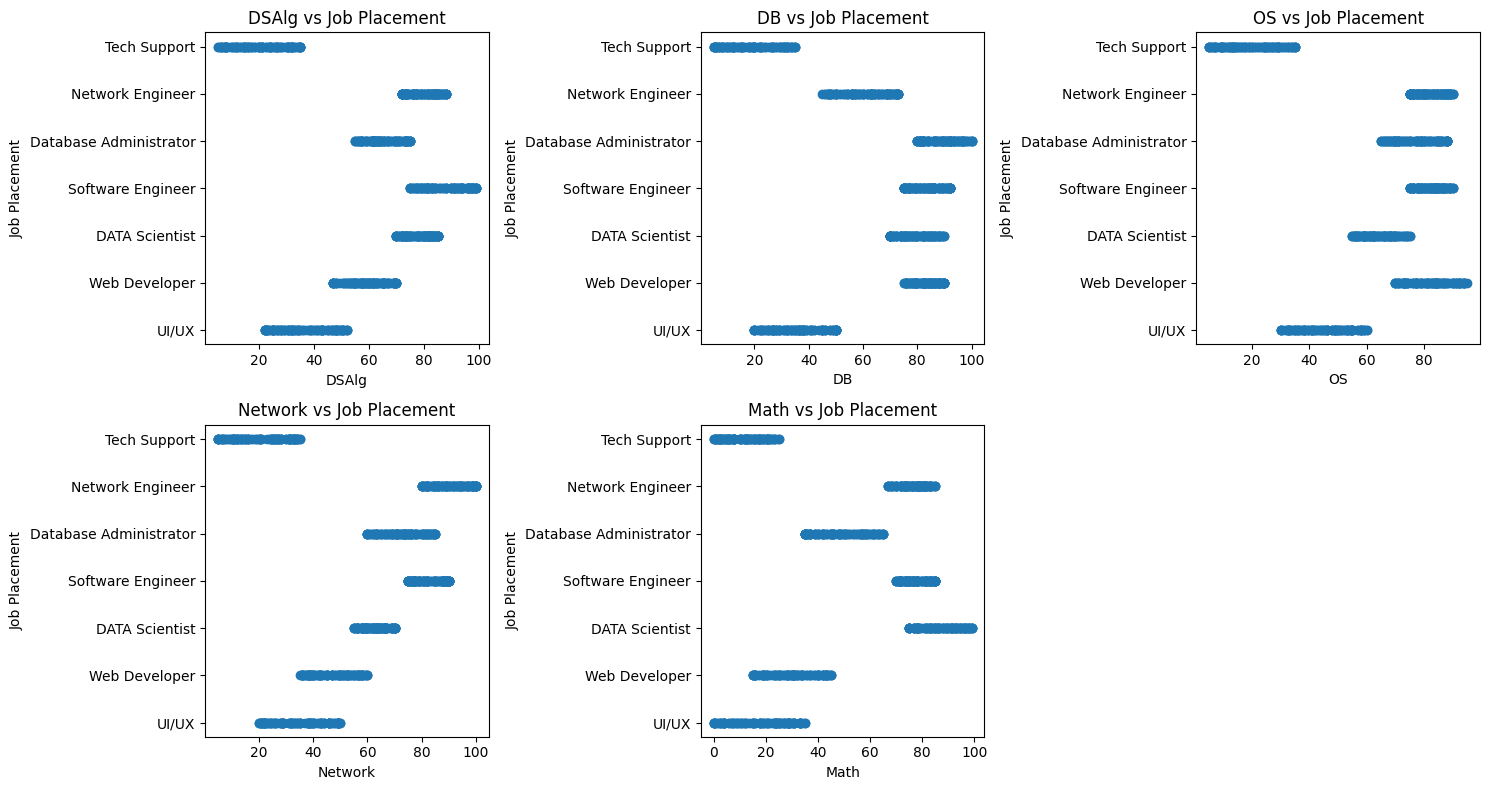

In [12]:
fig = plt.figure(figsize=(15, 8))

for i in range(len(classes.columns)):
    plt.subplot(2, 3, i+1)
    plt.scatter(classes[classes.columns[i]], students_data.Job)
    plt.title(f"{classes.columns[i]} vs Job Placement")
    plt.xlabel(classes.columns[i])
    plt.ylabel("Job Placement")
    

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.tight_layout()
plt.show()

3b. Next we look at the soft skills: general aptitude, communication skills, problem solving skills, and hackathon participation. The higher the value in these columns, the more participation students did in a particular area.

__Create a plot with 4 subplots__ to show any correlation between the soft skills (the next 4 columns) and the job placement.<br>
- Each subplot should have a title and clearly show the job descriptions (as text strings)
- Use a loop for the subplots. Don't copy and paste code.

Then __create a RawNB Convert cell to explain any correlation__ in each plot.<br>
You should have 4 short explanations, one for each subplot.<br>
For the explanation, explain which jobs require the soft skill the most and which jobs require the soft skill the least.

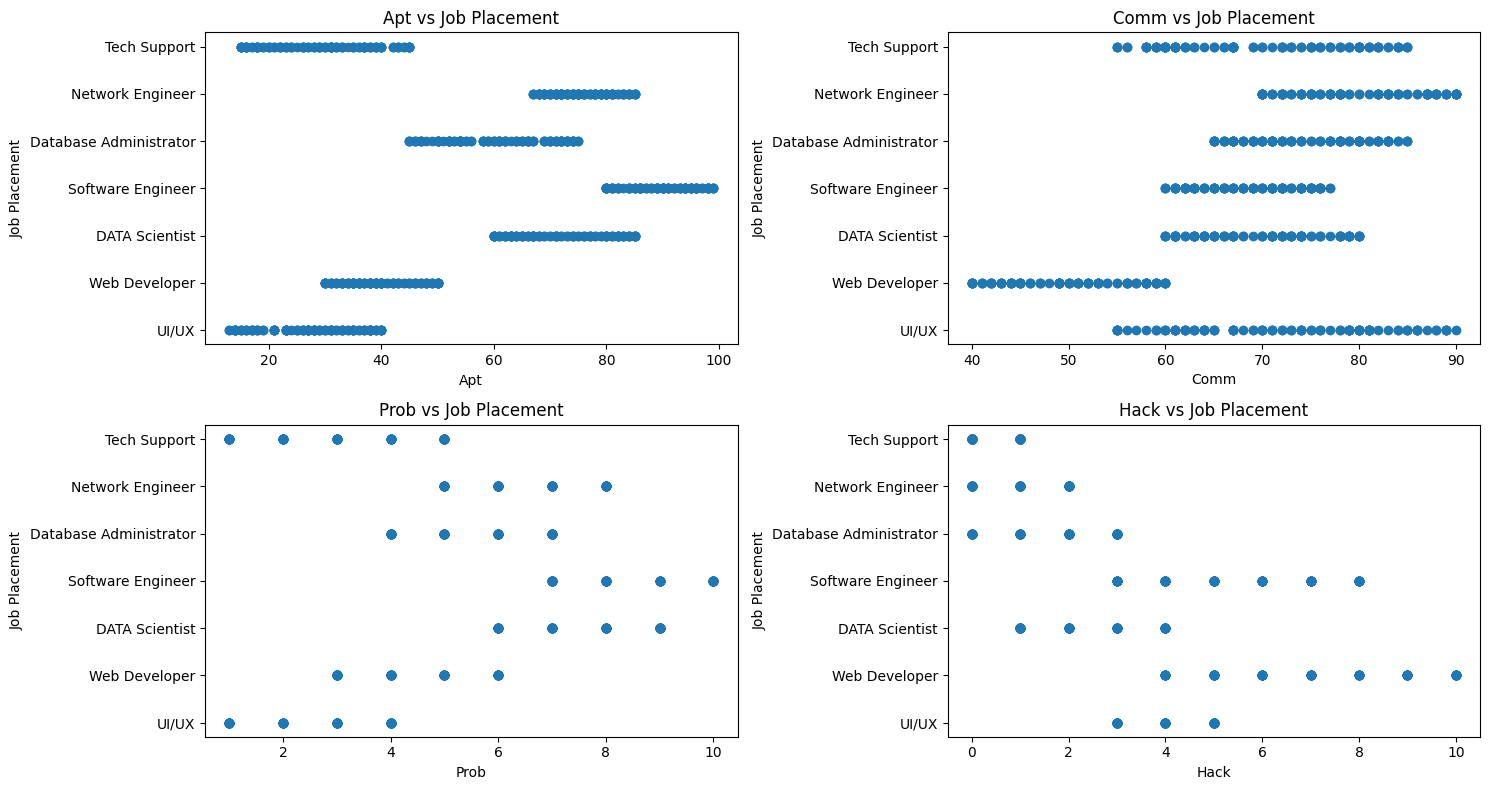

In [13]:
fig = plt.figure(figsize=(15, 8))

for i in range(len(softskills.columns)):
    plt.subplot(2, 2, i+1)
    plt.scatter(softskills[softskills.columns[i]], students_data.Job)
    plt.title(f"{softskills.columns[i]} vs Job Placement")
    plt.xlabel(softskills.columns[i])
    plt.ylabel("Job Placement")
    

plt.subplots_adjust(hspace=0.5, wspace=0.3) 
plt.tight_layout()
plt.show()

---

#### 4. Use the Kmeans Clustering model

4a. __Find the optimal number of clusters__.

In [14]:
# dropping the Job column
X = cleaned_data.drop(columns=["Job"], inplace=False)
X

,DSAlg,DB,OS,Network,Math,Apt,Comm,Prob,Creative,Hack,Skill1,Skill2
0,49,22,41,26,7,28,61,1,8,3,0,2
1,39,46,45,47,3,35,65,4,10,4,1,3
2,28,32,45,35,10,23,85,3,10,3,2,4
3,52,38,33,38,19,27,62,1,9,3,2,4
4,23,31,30,38,10,13,72,4,8,5,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
702,17,32,18,11,7,40,60,2,6,1,8,14
703,7,22,25,33,8,29,71,3,5,0,8,1
704,35,5,13,20,17,45,55,3,5,1,8,15
705,16,28,6,7,18,33,67,3,4,1,14,1


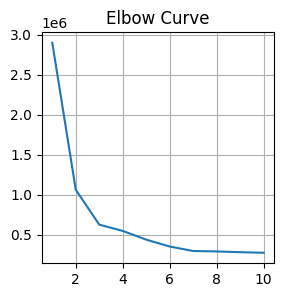

In [15]:
# determining the k
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++', n_init='auto') 
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
fig = plt.figure(figsize=(3,3))
plt.grid()
plt.plot(np.arange(1,11),wcss)
plt.title('Elbow Curve')
plt.show() 


# we will use k value of 7

4b. __Create a variable to store the optimum number of clusters__.<br>
Then __train and test the model__ with this number of clusters.

In [17]:
k = 7

kmeans = KMeans(n_clusters=k,init='k-means++', n_init='auto')
kmeans.fit(X)
y_kmeans = kmeans.predict(X) 

print(y_kmeans)


np.max(y_kmeans)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 6 5 5
 5 6 6 6 5 6 5 6 6 5 5 6 5 5 6 5 6 6 5 5 6 5 5 5 5 6 6 6 5 6 6 6 6 6 5 5 6
 6 6 5 6 6 6 6 6 5 6 6 6 5 6 5 6 5 5 5 5 5 6 6 5 5 6 6 6 5 5 6 6 6 6 5 6 6
 6 5 5 6 6 6 5 6 6 5 5 5 

6

---

#### 5. Find the attributes of each cluster.

5a. Create a Raw NBConvert cell below to __explain why it's not practical to use a plot to view the cluster attributes__.<br>
Your answer should be very short because it's a clear reason.

5b. Instead, __create a DataFrame from each cluster__.<br>
You should have as many separate DataFrames as you have number of clusters.<br>

Add extra Code cells as needed.

In [345]:
cluster1 = cleaned_data[y_kmeans ==0]

In [346]:
cluster2 = cleaned_data[y_kmeans ==1]

In [347]:
cluster3 = cleaned_data[y_kmeans ==2]

In [348]:
cluster4 = cleaned_data[y_kmeans ==3]

In [349]:
cluster5 = cleaned_data[y_kmeans ==4]

In [350]:
cluster6 = cleaned_data[y_kmeans ==5]

In [351]:
cluster7 = cleaned_data[y_kmeans ==6]

5c. Use one Code cell for each cluster, __show the basic statistics of each cluster's DataFrame__.<br>
When showing the statistics, don't show the last 3 columns, which are originally text strings.

In [352]:
cluster1.iloc[:, :10].describe()

,DSAlg,DB,OS,Network,Math,Apt,Comm,Prob,Creative,Hack
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,79.584158,60.663366,81.970297,90.297030,76.514851,75.534653,79.752475,6.485149,5.415842,0.920792
std,5.167722,8.363345,4.773794,6.347511,4.830350,5.135298,6.462826,1.045121,1.070209,0.808495
min,72.000000,45.000000,75.000000,80.000000,67.000000,67.000000,70.000000,5.000000,4.000000,0.000000
25%,75.000000,54.000000,78.000000,85.000000,73.000000,71.000000,74.000000,6.000000,4.000000,0.000000
50%,80.000000,62.000000,81.000000,90.000000,77.000000,75.000000,78.000000,6.000000,6.000000,1.000000
75%,84.000000,69.000000,86.000000,96.000000,80.000000,80.000000,86.000000,7.000000,6.000000,2.000000
max,88.000000,73.000000,90.000000,100.000000,85.000000,85.000000,90.000000,8.000000,7.000000,2.000000


In [353]:
cluster2.iloc[:, :10].describe()

,DSAlg,DB,OS,Network,Math,Apt,Comm,Prob,Creative,Hack
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,36.186275,34.872549,44.715686,34.882353,18.186275,26.970588,72.686275,2.627451,8.696078,3.921569
std,9.535479,8.862728,8.850102,9.373751,10.605183,8.186509,9.926443,1.168240,1.106141,0.971742
min,21.000000,20.000000,30.000000,20.000000,0.000000,13.000000,55.000000,1.000000,6.000000,0.000000
25%,28.000000,27.000000,37.000000,26.250000,9.000000,21.000000,64.000000,2.000000,8.000000,3.000000
50%,34.500000,35.000000,45.000000,34.500000,19.500000,27.000000,73.500000,3.000000,9.000000,4.000000
75%,45.000000,41.000000,52.750000,43.000000,27.000000,34.000000,80.750000,4.000000,10.000000,5.000000
max,52.000000,50.000000,60.000000,50.000000,35.000000,40.000000,90.000000,4.000000,10.000000,5.000000


In [354]:
cluster3.iloc[:, :10].describe()

,DSAlg,DB,OS,Network,Math,Apt,Comm,Prob,Creative,Hack
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,59.297030,83.188119,81.900990,47.376238,30.059406,39.297030,49.980198,4.396040,8.009901,6.970297
std,6.591729,4.381125,7.287668,7.605066,9.111336,6.027511,6.284871,1.123203,0.830603,2.017203
min,47.000000,75.000000,70.000000,35.000000,15.000000,30.000000,40.000000,3.000000,7.000000,4.000000
25%,55.000000,79.000000,76.000000,40.000000,23.000000,35.000000,44.000000,3.000000,7.000000,5.000000
50%,60.000000,83.000000,82.000000,47.000000,30.000000,38.000000,50.000000,4.000000,8.000000,7.000000
75%,65.000000,87.000000,87.000000,54.000000,38.000000,44.000000,56.000000,5.000000,9.000000,9.000000
max,70.000000,90.000000,95.000000,60.000000,45.000000,50.000000,60.000000,6.000000,9.000000,10.000000


In [355]:
cluster4.iloc[:, :10].describe()

,DSAlg,DB,OS,Network,Math,Apt,Comm,Prob,Creative,Hack
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,20.580000,19.120000,19.180000,20.290000,11.470000,29.750000,69.92000,3.140000,4.160000,0.510000
std,9.223575,9.286984,9.094765,9.495661,7.171006,9.144602,9.24272,1.477235,1.548672,0.559491
min,5.000000,5.000000,5.000000,5.000000,0.000000,15.000000,55.00000,1.000000,2.000000,0.000000
25%,12.750000,11.000000,12.000000,12.000000,5.000000,22.000000,61.00000,2.000000,3.000000,0.000000
50%,21.000000,19.000000,18.500000,20.500000,12.000000,30.500000,69.50000,3.000000,4.000000,0.000000
75%,28.250000,27.250000,27.000000,28.000000,17.250000,37.000000,79.00000,5.000000,5.000000,1.000000
max,35.000000,35.000000,41.000000,35.000000,25.000000,45.000000,85.00000,5.000000,9.000000,3.000000


In [356]:
cluster5.iloc[:, :10].describe()

,DSAlg,DB,OS,Network,Math,Apt,Comm,Prob,Creative,Hack
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,78.138614,79.128713,63.960396,62.633663,87.207921,71.821782,69.455446,7.613861,5.534653,2.435644
std,4.754008,6.067394,5.589134,4.397096,7.298379,8.266070,6.265022,1.165936,1.044647,1.161170
min,70.000000,70.000000,55.000000,55.000000,75.000000,60.000000,60.000000,6.000000,4.000000,1.000000
25%,74.000000,74.000000,59.000000,59.000000,81.000000,64.000000,64.000000,7.000000,5.000000,1.000000
50%,79.000000,79.000000,63.000000,63.000000,87.000000,71.000000,70.000000,8.000000,6.000000,2.000000
75%,82.000000,84.000000,68.000000,66.000000,93.000000,80.000000,74.000000,9.000000,6.000000,3.000000
max,85.000000,90.000000,75.000000,70.000000,99.000000,85.000000,80.000000,9.000000,7.000000,4.000000


In [357]:
cluster6.iloc[:, :10].describe()

,DSAlg,DB,OS,Network,Math,Apt,Comm,Prob,Creative,Hack
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,65.237624,89.158416,77.039604,72.920792,48.712871,60.792079,74.326733,5.594059,5.089109,1.465347
std,5.961793,6.026164,7.246959,7.278301,9.495616,9.151302,5.985163,1.115152,1.393549,1.171020
min,55.000000,80.000000,65.000000,60.000000,35.000000,45.000000,65.000000,4.000000,3.000000,0.000000
25%,61.000000,84.000000,71.000000,68.000000,40.000000,53.000000,69.000000,5.000000,4.000000,0.000000
50%,64.000000,89.000000,78.000000,73.000000,48.000000,61.000000,74.000000,6.000000,5.000000,1.000000
75%,71.000000,94.000000,84.000000,78.000000,57.000000,70.000000,80.000000,7.000000,6.000000,3.000000
max,75.000000,100.000000,88.000000,85.000000,65.000000,75.000000,85.000000,7.000000,7.000000,3.000000


In [358]:
cluster7.iloc[:, :10].describe()

,DSAlg,DB,OS,Network,Math,Apt,Comm,Prob,Creative,Hack
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,87.693069,83.287129,82.445545,82.346535,77.405941,89.485149,68.633663,8.445545,6.108911,5.445545
std,7.661257,5.466876,4.313874,5.208523,4.709943,5.804505,5.053163,1.195619,0.760276,1.670181
min,75.000000,75.000000,75.000000,75.000000,70.000000,80.000000,60.000000,7.000000,5.000000,3.000000
25%,81.000000,78.000000,79.000000,77.000000,74.000000,85.000000,64.000000,7.000000,6.000000,4.000000
50%,88.000000,84.000000,83.000000,82.000000,77.000000,90.000000,69.000000,8.000000,6.000000,5.000000
75%,94.000000,88.000000,86.000000,88.000000,82.000000,94.000000,73.000000,10.000000,7.000000,7.000000
max,99.000000,92.000000,90.000000,90.000000,85.000000,99.000000,77.000000,10.000000,7.000000,8.000000


5d. Observe the basic statistics of each cluster and __create a RawNB Convert cell to answer the following questions__:
- Which cluster generally has the highest values for the classes taken (Data Structures - Algorithms, Database, etc.)? Which has the lowest?
- Which cluster generally has the highest values for the soft skills? Which cluster has the lowest?

5d. __Show the jobs associated with each cluster__<br>
-The output should show the cluster number and the text strings for each job in the cluster.<br>
-The job name should only appear one time in the cluster.<br>
Hint: use the dictionary that was used to convert the job names to numbers.

In [365]:
# reverse the dict values
job_col = dict((v, k) for k, v in job_col.items())
job_col 

{0: 'UI/UX',
 1: 'Web Developer',
 2: 'DATA Scientist',
 3: 'Software Engineer',
 4: 'Database Administrator',
 5: 'Network Engineer',
 6: 'Tech Support'}

In [366]:
cleaned_data.Job = cleaned_data.Job.replace(job_col)
cleaned_data["Clusters"] = y_kmeans
cleaned_data

,DSAlg,DB,OS,Network,Math,Apt,Comm,Prob,Creative,Hack,Skill1,Skill2,Job,Clusters
0,49,22,41,26,7,28,61,1,8,3,0,2,UI/UX,1
1,39,46,45,47,3,35,65,4,10,4,1,3,UI/UX,1
2,28,32,45,35,10,23,85,3,10,3,2,4,UI/UX,1
3,52,38,33,38,19,27,62,1,9,3,2,4,UI/UX,1
4,23,31,30,38,10,13,72,4,8,5,1,4,UI/UX,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,17,32,18,11,7,40,60,2,6,1,8,14,Tech Support,3
703,7,22,25,33,8,29,71,3,5,0,8,1,Tech Support,3
704,35,5,13,20,17,45,55,3,5,1,8,15,Tech Support,3
705,16,28,6,7,18,33,67,3,4,1,14,1,Tech Support,3


In [376]:
# remove duplicates from job column
job = cleaned_data.Job.drop_duplicates()
job.reset_index(drop=True, inplace=True)

# remove duplicates from cluster column
cluster = cleaned_data.Clusters.drop_duplicates()
cluster.reset_index(drop=True, inplace=True)

# make new df to show job and cluster association
df = pd.concat([job,cluster], axis=1)


df["Clusters"] += 1
display(df.sort_values(by="Clusters"))

,Job,Clusters
6,Tech Support,1
0,UI/UX,2
2,DATA Scientist,3
1,Web Developer,4
3,Software Engineer,5
5,Network Engineer,6
4,Database Administrator,7


5e. What can you conclude about the jobs in each cluster and the classes and skills needed for those jobs?<br>
__Create a RawNB Convert for your answer__.<br>
Refer to the plots and statistics that you found in your answer. Any conclusion should be backed up by data you've found.